###                                                                                         Name: Sharon Laurance Muthipeedika 
###                                                                                         Matriculation No: 312486

### Exercise 1: Gradient Descent on Rosenbrock function

In [1]:
# Importing Required Libraries
import matplotlib.pyplot as plt
from numpy import *
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.pyplot import *
from numpy import *

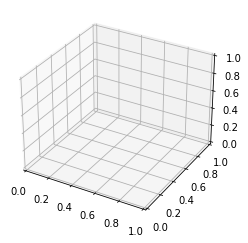

In [2]:
#To plot 3d Figure we use this 
fig = plt.figure()
ax = plt.axes(projection='3d')

#### 1. Implement a 3D plot to visualize the function (Use Matplotlib’s 3D utilities)


In [3]:
x=np.linspace(0, 15, 100)
y=np.linspace(0,15,100)
X, Y = meshgrid(x, y)
z=(1-X)**2+100*((Y-(X**2)))**2

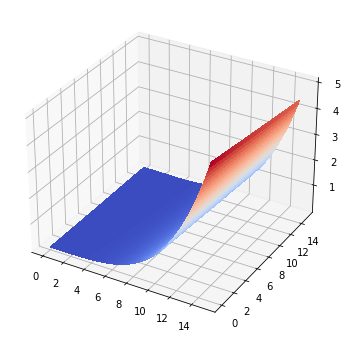

In [4]:
fig=plt.rcParams['figure.figsize']=(6,6) 
X,Y=np.meshgrid(x,y)
z=(1-X)**2+100*((Y-(X**2)))**2
fig = figure(3)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y, z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
# ax.set_zlim(0, 1500)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# fig.colorbar(surf, shrink=0.5, aspect=5)
show()



#### 2. Derive the partial gradients. (Please look into how to typeset latex in Jupyter notebooks



\begin{equation*}
\begin{vmatrix}
\mathbf{Column} \\
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y} 
\end{vmatrix}
\end{equation*}

In [5]:
# x = symbols('x')
# y = symbols('y') 
#Define function
f = (1-x)**2+100*((y-(x**2)))**2
#Calculating Partial Derivative for x and y
derivative_fx = -400*x*(-x**2 + y) + 2*x - 2
derivative_fy = -200*x**2 + 200*y 

#### 3. Convert the function and gradient of this function into equivalent code representation.

$\begin{equation*}
\frac{\partial f}{\partial x} =-400*x*(y -x^2 ) + 2*x - 2\\
\frac{\partial f}{\partial x} =-200*x^2 + 200*y
\end{equation*}$

#### 4. Optimize the function with Gradient Descent. Set the appropriate hyperparameters like initial values of (x,y) and the steplength α through trial and error.

In [6]:
#Gradient Descent
def objective_function(x,y):
    f = (1-x)**2+100*((y-(x**2)))**2
    return f
def get_gradient(a,b):
    dx=-400*a*(-a**2 + b) + 2*a - 2
    dy=-200*a**2 + 200*b
    
    return dx,dy
def gradient_descent_algo(f,x,y,K,alpha):
    for k in range(0,K):
        gradient_direction=np.array(get_gradient(x,y))
        (x_old,y_old)=(x,y)
        print(x_old,y_old)
        (x,y)=(x_old,y_old)-np.dot(alpha,gradient_direction)
        print(x,y)
        print(objective_function(x_old,y_old)-objective_function(x,y))
#         if (np.linalg.norm(gradient_direction)<0.06): 
#             return (x,y)
        if(objective_function(x_old,y_old)-objective_function(x,y)<0.006):
            return (x,y)
        elif(k==1000):
            return "Did not converge in ",K," iterations"

In [7]:
f = (1-x)**2+100*((y-(x**2)))**2
x=10
y=10
alpha=0.00001
K=1000
result=gradient_descent_algo(f,x,y,K,alpha)
print("Result is",result)
print("Function value",objective_function(result[0],result[1]))

10 10
6.39982 10.18
715325.1846376865
6.39982 10.18
5.611825145111704 10.2415553920648
49573.93554007942
5.611825145111704 10.2415553920648
5.134704738834483 10.284057444199286
19304.492750498666
5.134704738834483 10.284057444199286
4.804334517994687 10.316219714820907
9567.343725191507
4.804334517994687 10.316219714820907
4.558941223136469 10.341750535712855
5393.434602166619
4.558941223136469 10.341750535712855
4.368448639712866 10.362634924793456
3300.1864617090323
4.368448639712866 10.362634924793456
4.215997400378104 10.380076341979487
2138.1312293045803
4.215997400378104 10.380076341979487
4.091231335628421 10.394865457455518
1444.9792165220933
4.091231335628421 10.394865457455518
3.9873617428701857 10.407552074223863
1008.7285306598169
3.9873617428701857 10.407552074223863
3.899715582163543 10.418535077412425
722.4867094610163
3.899715582163543 10.418535077412425
3.8249507903484967 10.42811357050114
528.3224123470648
3.8249507903484967 10.42811357050114
3.7606024533103586 10.436

In [8]:
f = (1-x)**2+100*((y-(x**2)))**2
x=10
y=10
alpha=0.05
K=1000
result_new=gradient_descent_algo(f,x,y,K,alpha)
print("Result is",result_new)
print("Function value",objective_function(result_new[0],result_new[1]))

10 10
-17990.9 910.0
-1.0476328704852814e+19
Result is (-17990.9, 910.0)
Function value 1.0476328704853625e+19


Faster convergence when step size is increased

#### 5. Visualize the trajectory on the same 3D plot. This trajectory should ideally lead to the function minimum, starting off with (x = 10, y = 10) for example.


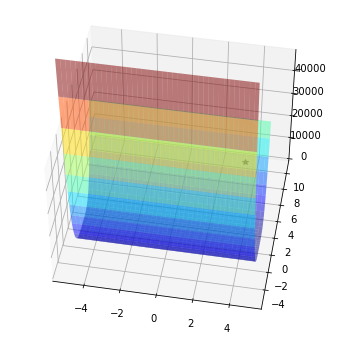

In [9]:
x=np.linspace(-5, 5, 200)
y=np.linspace(-5,5,200)
X, Y = np.meshgrid(x, y)
z=(1-X)**2+100*((Y-(Y**2)))**2
# fig = figure(3)
# fig = plt.figure()
ax = plt.axes(projection='3d')
# ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, z, rstride=5, cstride=5, cmap='jet',alpha=.5,linewidth=2,edgecolor="none")
ax.plot(result[0],result[1],objective_function(result[0],result[1]),color='black',marker='*',alpha=.5)
ax.set_zlim(0,48000)
ax.view_init(45,280)

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



#### References
 - https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
 - https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214